In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-02-13 16:49:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2024-02-13 16:49:04 (2.76 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
data = pd.read_csv("FuelConsumption.csv")
#deskripi data (statistik deskriptif)
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
dataku = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
dataku.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


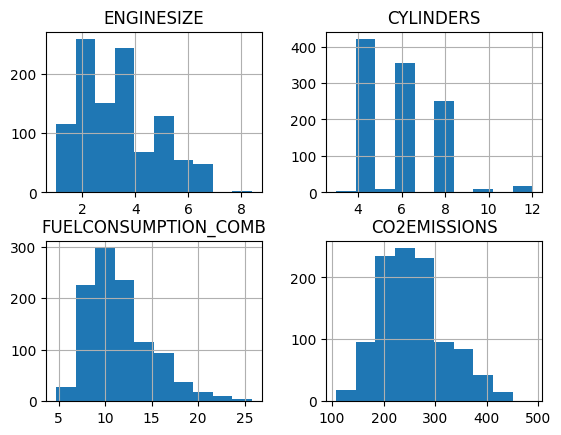

In [ ]:
#visualisasi u/ lihat fitur (colums)

vis = dataku[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
vis.hist() #lihat history
plt.show()

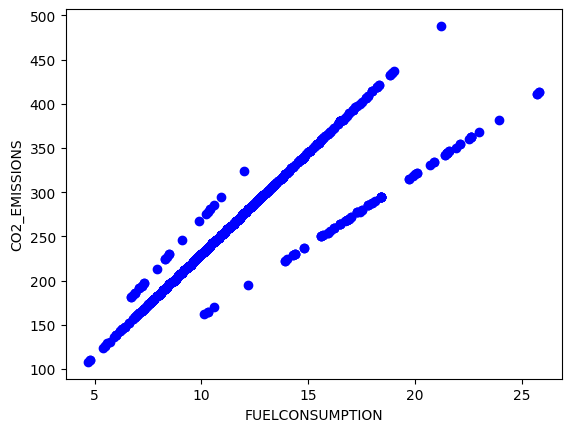

In [ ]:
#cek korelasi 2 variable / fiture(colums)
plt.scatter(dataku.FUELCONSUMPTION_COMB, dataku.CO2EMISSIONS, color='blue') #nampilin sebaran data dengan dots(titik), dengan membandingkan antara{col : 'fuelconsum' dan 'co2_emision'}
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("CO2_EMISSIONS")
plt.show()

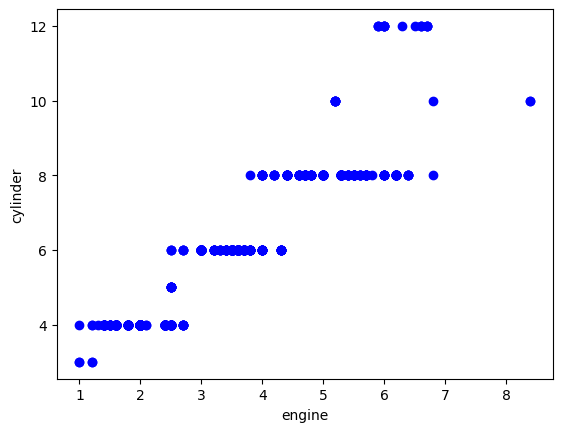

In [ ]:
plt.scatter(dataku.ENGINESIZE, dataku.CYLINDERS,color='blue' )
plt.xlabel("engine")
plt.ylabel("cylinder")
plt.show()

In [ ]:
# SPLIT DATA BERDASARKAN data yang dibandingkan
# Train- Test
a = np.random.rand(len(data)) < 0.8
train = dataku[a]
test = dataku[~a]


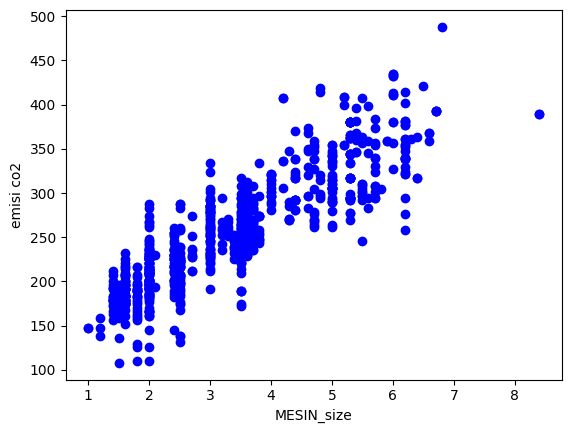

In [ ]:
# view distribusi data train
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue' )
plt.xlabel("MESIN_size")
plt.ylabel("emisi co2")
plt.show()

In [ ]:
# call regresi. hitung => y = a + b.x
from sklearn import linear_model
N_regresi = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
N_regresi.fit(train_x, train_y)

# hitung N var a dan var b
print('Nilai b atau Koefisien: ' , N_regresi.coef_)
print('Nilai a atau Intersep: ' , N_regresi.intercept_)


Nilai b atau Koefisien:  [[38.6319219]]
Nilai a atau Intersep:  [127.24830258]


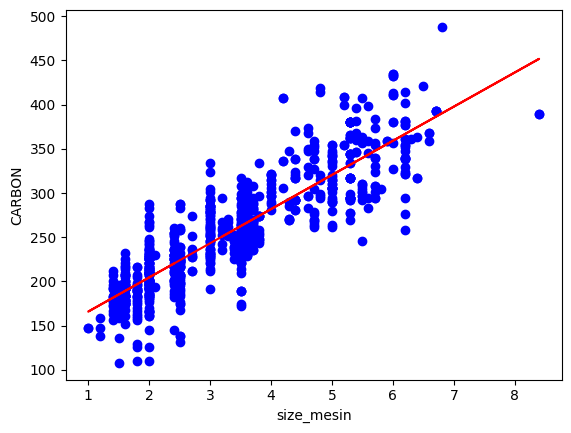

In [ ]:
# garis persamaan linear
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue' )
plt.plot(train_x, N_regresi.coef_[0][0]*train_x + N_regresi.intercept_[0], '-r')
plt.xlabel("size_mesin")
plt.ylabel("CARBON")
plt.show()

In [ ]:
# evaluasi
from sklearn.metrics import r2_score
test_x = np.asanyarray(test['ENGINESIZE'])
test_y = np.asanyarray(test['CO2EMISSIONS'])
test_x = test_x.reshape(-1,1) # u/ reshape dimensi array
test_y_ = N_regresi.predict(test_x)
print('Nilai MSE(mean absolute error)-nya: %2.f' % np.mean(np.absolute(test_y_ - test_y)))
print('Nilai r2-score-nya : %2.f' % r2_score(test_y_, test_y))

Nilai MSE(mean absolute error)-nya: 67
Nilai r2-score-nya :  1


NLR


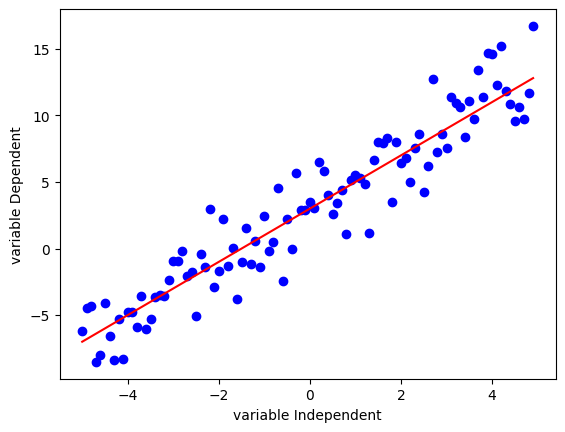

In [ ]:
x = np.arange(-5.0,5.0, 0.1)

y  = 2*x + 3
y_noise = 2*np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x,ydata, 'bo')
plt.plot(x,y,'r')

plt.ylabel('variable Dependent')
plt.xlabel('variable Independent')

plt.show()

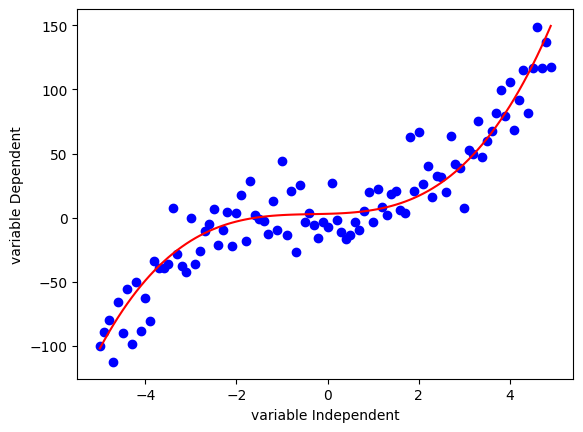

In [ ]:
# persamaan kubik

x = np.arange(-5.0,5.0, 0.1)


y  = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x,ydata, 'bo')
plt.plot(x,y,'r')

plt.ylabel('variable Dependent')
plt.xlabel('variable Independent')

plt.show()

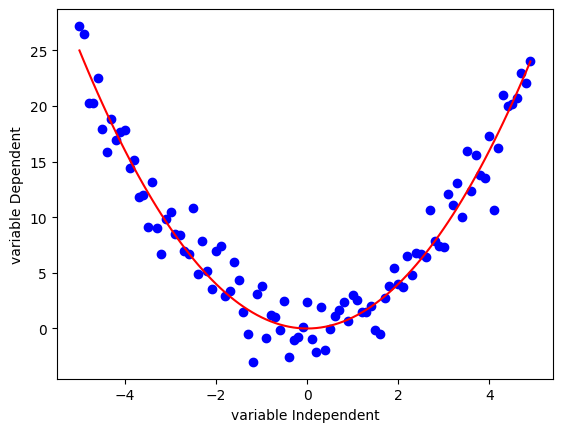

In [ ]:
# PERBANDINGAN y = x^2 => kuadrad

x = np.arange(-5.0,5.0, 0.1)


y  = np.power(x,2)
y_noise = 2 * np.random.normal(size = x.size)
ydata = y + y_noise

plt.plot(x,ydata, 'bo')
plt.plot(x,y,'r')

plt.ylabel('variable Dependent')
plt.xlabel('variable Independent')

plt.show()

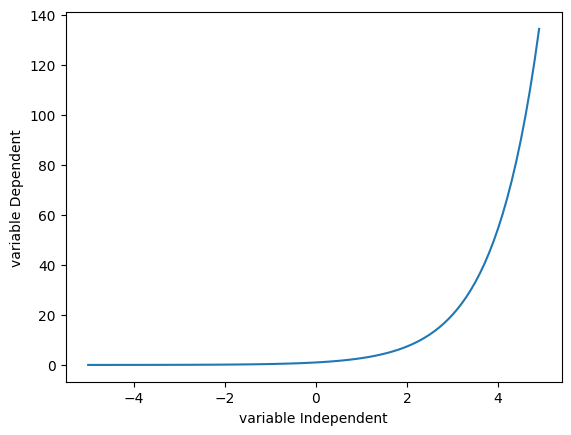

In [ ]:
# EXPONENSIAL => y = a + b.C^x

x = np.arange(-5.0,5.0, 0.1)


y  = np.exp(x)
# y_noise = 2 * np.random.normal(size = x.size)
# ydata = y + y_noise

# plt.plot(x,ydata, 'bo')
plt.plot(x,y)

plt.ylabel('variable Dependent')
plt.xlabel('variable Independent')

plt.show()

In [ ]:
# SIGMOID / sigmoa => y = a +

 $$ y = a \frac{b}{1+c^}

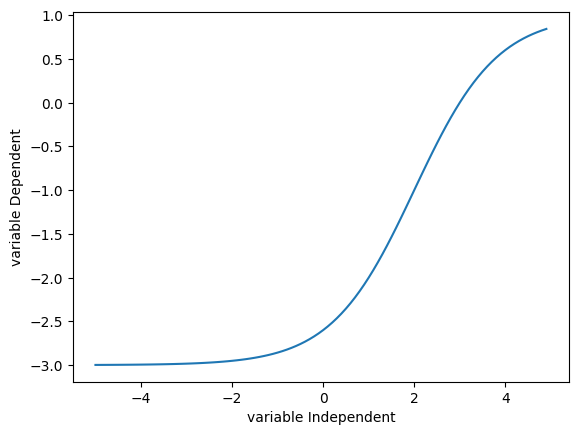

In [ ]:
# SIGMOID / sigmoa
x = np.arange(-5.0,5.0, 0.1)



y = 1-4 / (1+np.power(3, x-2))
# y_noise = 2 * np.random.normal(size = x.size)
# ydata = y + y_noise

plt.plot(x,y)

plt.ylabel('variable Dependent')
plt.xlabel('variable Independent')

plt.show()

  CHINA GDP
  

In [ ]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2024-02-13 16:49:07 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [ ]:
df = pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


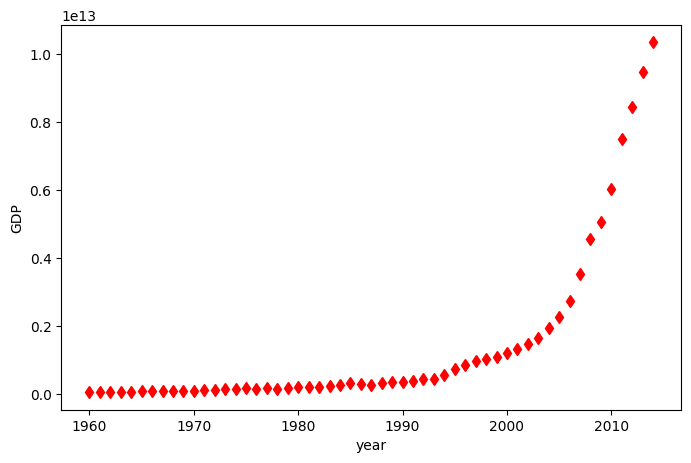

In [ ]:
plt.figure (figsize = (8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'rd')
plt.ylabel('GDP')
plt.xlabel('year')
plt.show()

tugas


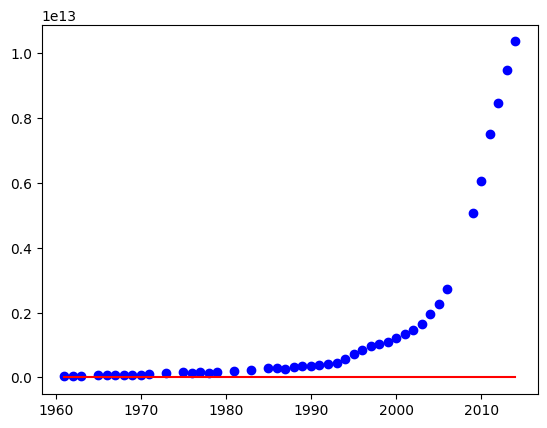

In [ ]:
a = np.random.rand(len(df)) < 0.8
train = df[a]
test = df[~a]



regresi = N_regresi
trainx = np.asanyarray(train[["Year"]])
trainy = np.asanyarray(train[["Value"]])

plt.scatter(train.Year, train.Value, color ='blue')

plt.plot(trainx, regresi.coef_[0][0]*trainx + regresi.intercept_[0], '-r')

